In [1672]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [1673]:
# Read in data into a dataframe
data = pd.read_csv('ebw_data.csv')

# Display top of dataframe
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [1674]:
# Statistical measures of the training dataset
data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [1675]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [1676]:
# Find duplicates
data[data.duplicated()]

,IW,IF,VW,FP,Depth,Width
11,45,140,8.0,80,1.20,1.96
31,47,139,4.5,80,1.36,2.48
46,46,146,10.0,60,1.36,1.76
54,43,150,9.0,50,1.08,1.82
55,43,150,9.0,50,1.08,1.82
59,44,146,9.0,60,1.20,1.76
70,45,146,9.0,60,1.28,1.76


In [1677]:
# Drop duplicated rows, keep first
data = data.drop_duplicates(keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      65 non-null     int64  
 1   IF      65 non-null     int64  
 2   VW      65 non-null     float64
 3   FP      65 non-null     int64  
 4   Depth   65 non-null     float64
 5   Width   65 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.6 KB


In [1678]:
# Find all correlations with the Width and sort
data.corr()['Width'].sort_values()

VW      -0.873454
IF      -0.492898
FP       0.394702
IW       0.413800
Depth    0.433860
Width    1.000000
Name: Width, dtype: float64

In [1679]:
# Find all correlations with the Depth and sort
data.corr()['Depth'].sort_values()

VW      -0.687108
FP      -0.546500
IW      -0.341494
IF       0.421896
Width    0.433860
Depth    1.000000
Name: Depth, dtype: float64

<AxesSubplot: >

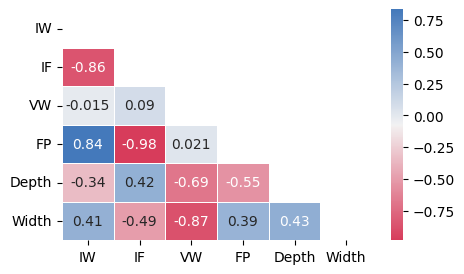

In [1700]:
# Correlation heatmap
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize=(5,3))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap=cmap, annot=True,linewidths=0.5, linecolor='white',mask=mask)

In [1681]:
# Separating out the features and targets
features = data.drop(columns=['Width', 'Depth'])
targets = data.drop(columns=['IF', 'FP', 'IW', 'VW'])

In [1682]:
# Splitting into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(45, 4) (20, 4)
(45, 2) (20, 2)


In [1683]:
# Training a Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)
print(regressor.coef_)

[14.66524752  2.73477018]
[[ 0.01435022 -0.08275264 -0.04695704 -0.02570023]
 [ 0.03128333 -0.0090395  -0.11432043  0.00100057]]


In [1684]:
# Making Predictions
y_pred = regressor.predict(X_test)
y_pred

array([[1.25014486, 1.82261969],
       [1.25014486, 1.82261969],
       [1.56976608, 2.51419955],
       [1.25014486, 1.82261969],
       [1.458313  , 2.4425934 ],
       [1.25014486, 1.82261969],
       [1.13164689, 1.83607484],
       [1.11729667, 1.80479152],
       [1.26449507, 1.85390301],
       [0.83136344, 2.03406223],
       [0.83136344, 2.03406223],
       [1.29396338, 2.04247188],
       [1.22874974, 1.87639767],
       [1.11729667, 1.80479152],
       [0.85687509, 2.28494691],
       [0.95425873, 1.96065182],
       [1.56976608, 2.51419955],
       [1.13164689, 1.83607484],
       [1.22874974, 1.87639767],
       [1.29396338, 2.04247188]])

In [1685]:
# Calculating R2 - the value of the coefficient of determination for the expected test model
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print(f'R2: {r2:.2f}')

R2: 0.90


In [1686]:
# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Linear Regression Model:')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Linear Regression Model:
Mean absolute error: 0.06
Mean squared error: 0.01
Root mean squared error: 0.08


In [1687]:
# Training a Random Forest Model
regressor = RandomForestRegressor(n_estimators = 100, max_depth = 32, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, random_state=42)

In [1688]:
# Making Predictions
y_pred = regressor.predict(X_test)
y_pred

array([[1.22769696, 1.80405717],
       [1.22769696, 1.80405717],
       [1.50445826, 2.51730398],
       [1.22769696, 1.80405717],
       [1.6733619 , 2.51913333],
       [1.22769696, 1.80405717],
       [1.17044   , 1.79378   ],
       [1.00877286, 1.84522286],
       [1.30698805, 1.76753569],
       [0.8746081 , 2.04092381],
       [0.8746081 , 2.04092381],
       [1.10328952, 1.91645619],
       [1.16378333, 1.78610667],
       [1.00877286, 1.84522286],
       [0.81437905, 2.25235714],
       [0.96573429, 1.95747905],
       [1.50445826, 2.51730398],
       [1.17044   , 1.79378   ],
       [1.16378333, 1.78610667],
       [1.10328952, 1.91645619]])

In [1689]:
# Calculating R2 - the value of the coefficient of determination for the expected test model
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print(f'R2: {r2:.2f}')

R2: 0.94


In [1690]:
# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Random Forest Model:')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Random Forest Model:
Mean absolute error: 0.05
Mean squared error: 0.00
Root mean squared error: 0.06


In [1691]:
# Training a Gradient Boosting Model
regressor = MultiOutputRegressor(GradientBoostingRegressor(n_estimators = 100, random_state = 42))
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [1692]:
# Making Predictions
y_pred = regressor.predict(X_test)
y_pred

array([[1.23434894, 1.80787964],
       [1.23434894, 1.80787964],
       [1.48406839, 2.51584188],
       [1.23434894, 1.80787964],
       [1.68111377, 2.51924451],
       [1.23434894, 1.80787964],
       [1.17334915, 1.79197007],
       [0.99469568, 1.84658007],
       [1.3141083 , 1.76541828],
       [0.87030906, 2.03943217],
       [0.87030906, 2.03943217],
       [1.15712768, 1.96144551],
       [1.16753837, 1.79120146],
       [0.99469568, 1.84658007],
       [0.81408549, 2.25271884],
       [0.95362944, 1.9598808 ],
       [1.48406839, 2.51584188],
       [1.17334915, 1.79197007],
       [1.16753837, 1.79120146],
       [1.15712768, 1.96144551]])

In [1693]:
# Calculating R2 - the value of the coefficient of determination for the expected test model
r2 = r2_score(y_true = y_test, y_pred = y_pred)
print(f'R2: {r2:.2f}')

R2: 0.95


In [1694]:
# Evaluating the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Gradient Boosting Model:')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Gradient Boosting Model:
Mean absolute error: 0.04
Mean squared error: 0.00
Root mean squared error: 0.06
